In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from msresist.pre_processing import preprocessing
import numpy as np

In [6]:
matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [8]:
X = preprocessing(AXL_Das_DR=True, Vfilter=True, log2T=True, mc_row=False)
for i in range(X.shape[0]):
    X.iloc[i, 6:11] -= X.iloc[i, 6]
    X.iloc[i, 11:] -= X.iloc[i, 11]

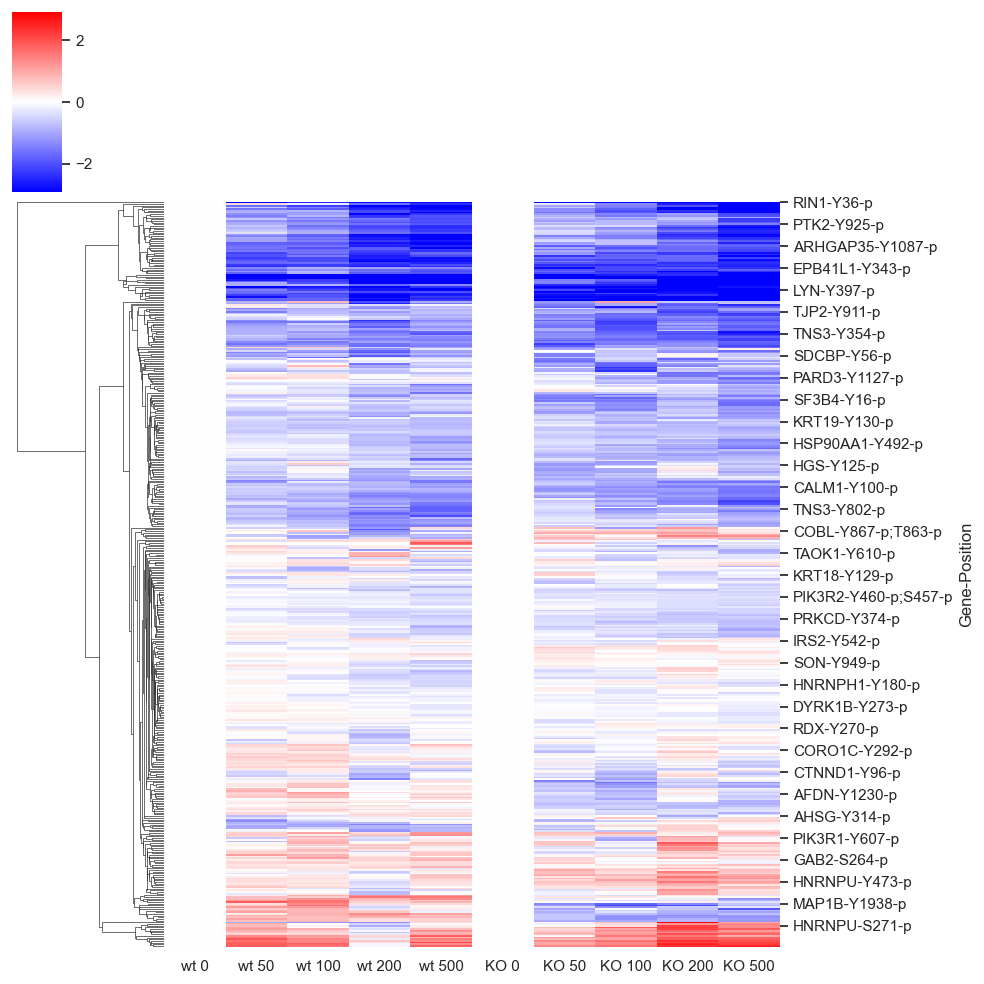

In [10]:
data = X.set_index(["Gene", "Position"]).select_dtypes(include=["float64"])
lim = np.max(abs(data.values)) * 0.5
g = sns.clustermap(data, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(10, 10), xticklabels=True, col_cluster=False)
data_dr = X.iloc[g.dendrogram_row.reordered_ind[:55], :].set_index(["Gene", "Position"]).select_dtypes(include=["float64"])

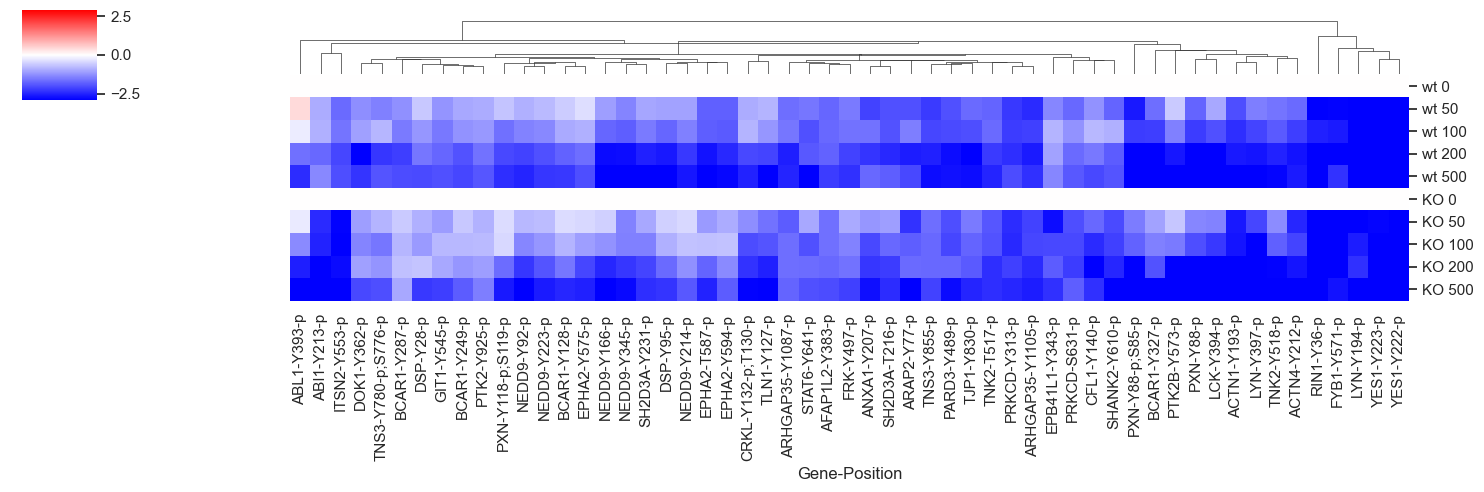

In [11]:
sns.clustermap(data_dr.T, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(15, 5), xticklabels=True, col_cluster=True, row_cluster=False)

In [18]:
fc = preprocessing(AXL_Das_DR=True, Vfilter=True, FCtoUT=True, log2T=False, mc_row=False).set_index(["Gene", "Position"])

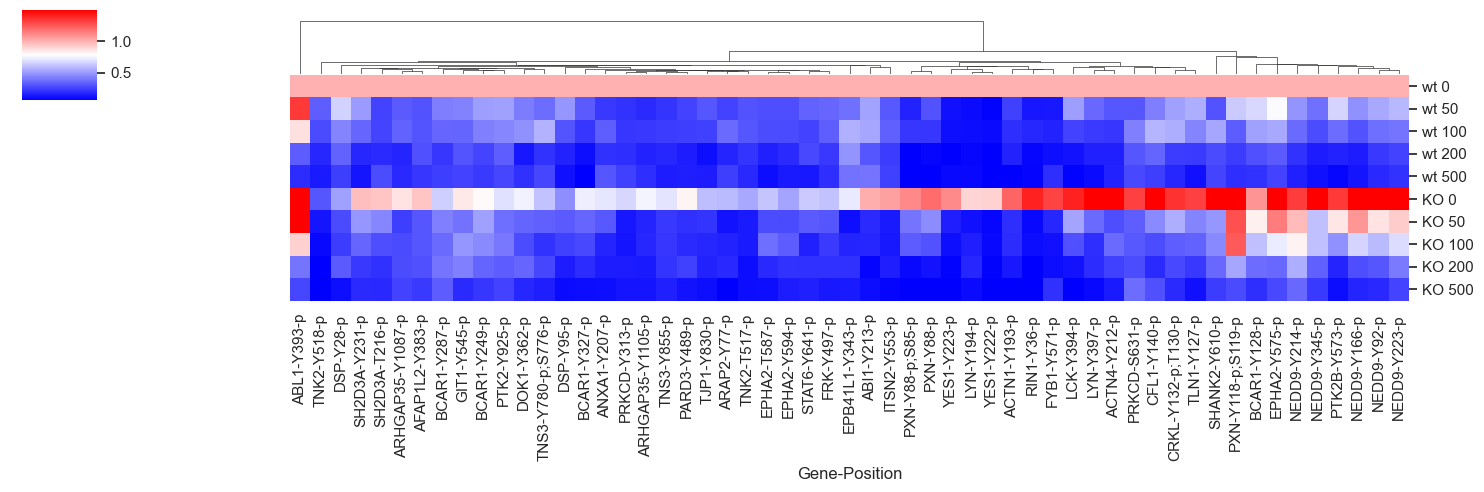

In [26]:
fc_dr = fc.loc[data_dr.index].iloc[:, 4:]
lim = np.max(abs(fc_dr.values)) * 0.5
sns.clustermap(fc_dr.T, method="centroid", cmap="bwr", robust=True, figsize=(15, 5), xticklabels=True, col_cluster=True, row_cluster=False)